In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda

layer1 = pd.read_csv('./data/layer_224.csv')
layer2 = pd.read_csv('./data/layer_225.csv')
layer3 = pd.read_csv('./data/layer_226.csv')
layer4 = pd.read_csv('./data/layer_227.csv')
layer5 = pd.read_csv('./data/layer_228.csv')


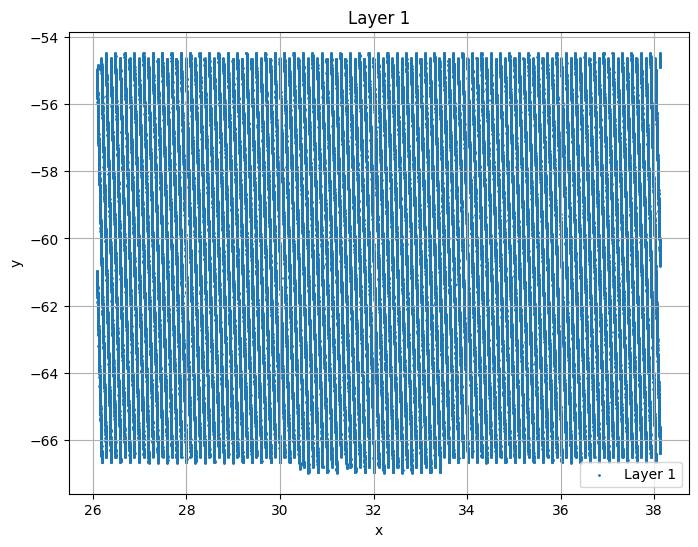

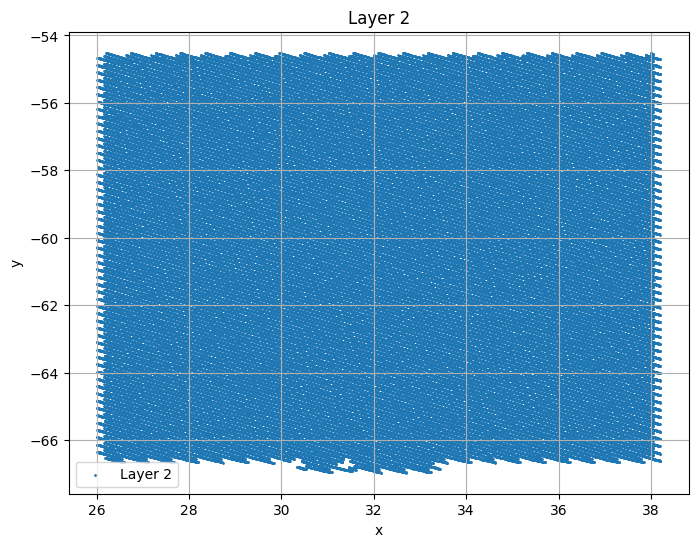

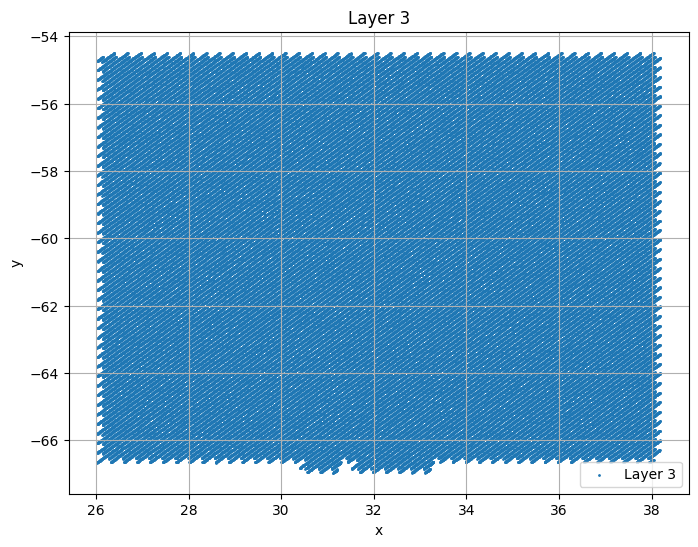

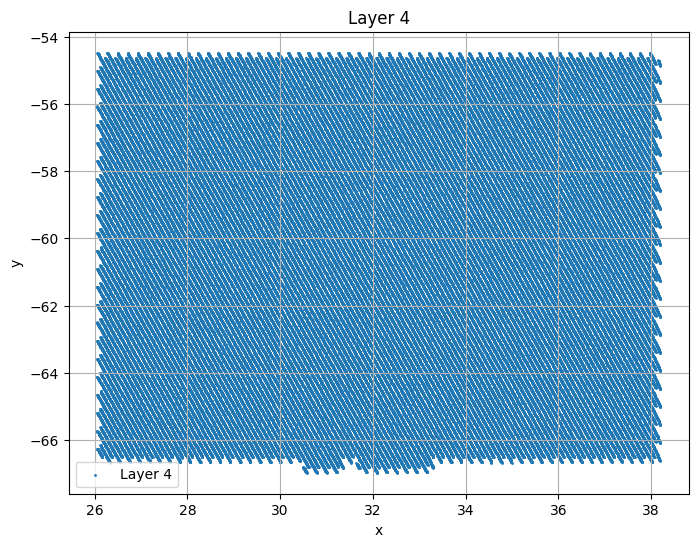

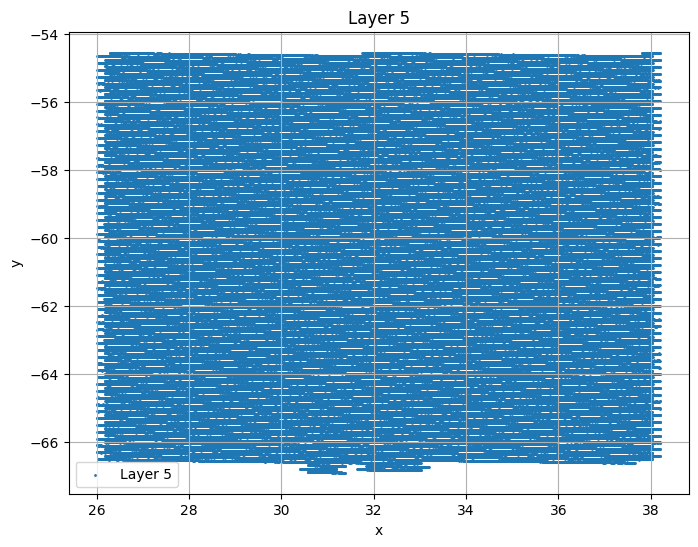

In [3]:
# Define the list of layers
layers = [layer1, layer2, layer3, layer4, layer5]

# Plot each layer
for idx, layer in enumerate(layers):
    plt.figure(figsize=(8, 6))
    plt.scatter(layer['x'], layer['y'], s=1, label=f'Layer {idx + 1}')
    plt.title(f'Layer {idx + 1}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

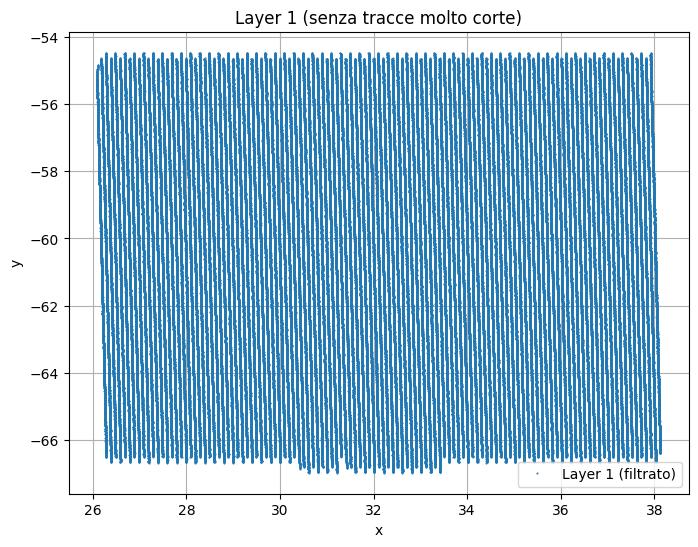

In [5]:
# Calcolo della lunghezza (range in y) per ogni track_id
track_lengths = layer1.groupby('track_id')['y'].agg(lambda x: x.max() - x.min())

# Trova la mediana
median_length = track_lengths.median()

# Mantieni solo le tracce che sono almeno il 70% della mediana
threshold = 0.7 * median_length
valid_tracks = track_lengths[track_lengths >= threshold].index

# Filtra il DataFrame
layer1_filtered = layer1[layer1['track_id'].isin(valid_tracks)]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(layer1_filtered['x'], layer1_filtered['y'], '.', markersize=1, label='Layer 1 (filtrato)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Layer 1 (senza tracce molto corte)')
plt.legend()
plt.grid(True)
plt.show()

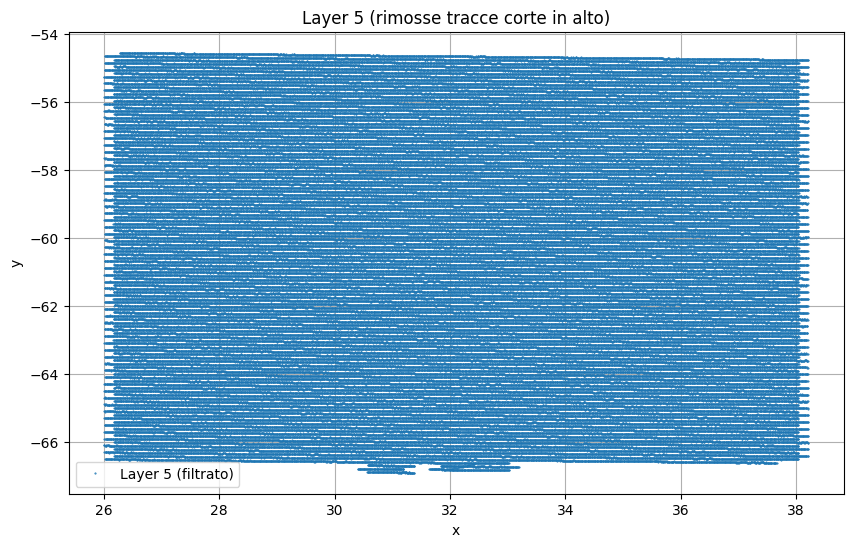

In [4]:
# Statistiche per ogni traccia
track_stats = layer5.groupby('track_id').agg(
    y_min=('y', 'min'),
    y_max=('y', 'max'),
    y_len=('y', lambda x: x.max() - x.min())
)

# Soglie
length_threshold = track_stats['y_len'].median() * 0.7  # troppo corta
lower_y_threshold = layer5['y'].min() + 0.5         # non scende abbastanza in basso

# Mantieni tracce:
# - lunghe abbastanza, oppure
# - che scendono abbastanza in basso
keep_ids = track_stats[
    (track_stats['y_len'] >= length_threshold) |
    (track_stats['y_min'] <= lower_y_threshold)
].index

# Filtra i dati
layer5_filtered = layer5[layer5['track_id'].isin(keep_ids)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(layer5_filtered['x'], layer5_filtered['y'], '.', markersize=1, label='Layer 5 (filtrato)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Layer 5 (rimosse tracce corte in alto)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Concatenazione dei dati di tutti i layer
combined_dataset = pd.concat([layer1_filtered, layer2, layer3, layer4, layer5_filtered], ignore_index=True)

# Mostra un'anteprima del dataset combinato
print(combined_dataset.head())

             t       x       y     z  layer_id  sensor0  sensor1    temp  \
0  127889450.0  37.919 -54.478  8.96       224    798.0    811.0  1570.1   
1  127889460.0  37.920 -54.485  8.96       224    798.0    816.0  1563.5   
2  127889470.0  37.920 -54.495  8.96       224    826.0    826.0  1587.7   
3  127889480.0  37.919 -54.506  8.96       224    808.0    822.0  1569.0   
4  127889490.0  37.919 -54.513  8.96       224    802.0    822.0  1561.0   

   track_id  track_orient  pos_rel  t_rel  
0         2           271  0.00000    0.0  
1         2           271  0.00803   10.0  
2         2           271  0.01605   20.0  
3         2           271  0.02408   30.0  
4         2           271  0.03211   40.0  


In [ ]:
# Perform the runs test for independence on the 'temp' column + normality
result = qda.Assumptions(combined_dataset['temp']).independence()
from scipy.stats import anderson
result = anderson(combined_dataset['temp'], dist='norm')
print(f"Anderson-Darling statistic: {result.statistic:.4f}")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f"Significance Level {sl}%: Critical Value {cv:.4f}")

# Display the result
print(result)

Runs test statistic = -531.394
Runs test p-value = 0.000

